In [1]:
import yass
print(yass.__version__)

/home/eduardo/miniconda3/envs/yass/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


0.4dev


In [39]:
import os.path as path

import numpy as np
import matplotlib.pyplot as plt

from yass.explore import RecordingExplorer, SpikeTrainExplorer

In [65]:
plt.rcParams['figure.figsize'] = (20, 10)

TMP = '/ssd/data/eduardo/tmp'
ROOT = '/ssd/data/eduardo'

path_to_geom = path.join(ROOT, 'ej49_geometry1.txt')

In [73]:
filtered = RecordingExplorer(path.join(TMP, 'filtered.bin'), spike_size=15)
standarized = RecordingExplorer(path.join(TMP, 'standarized.bin'), spike_size=15,
                                path_to_geom=path_to_geom, n_channels=49,
                                neighbor_radius=70, data_format='wide',
                               dtype='float16')
whitened = RecordingExplorer(path.join(TMP, 'whitened.bin'), spike_size=15)

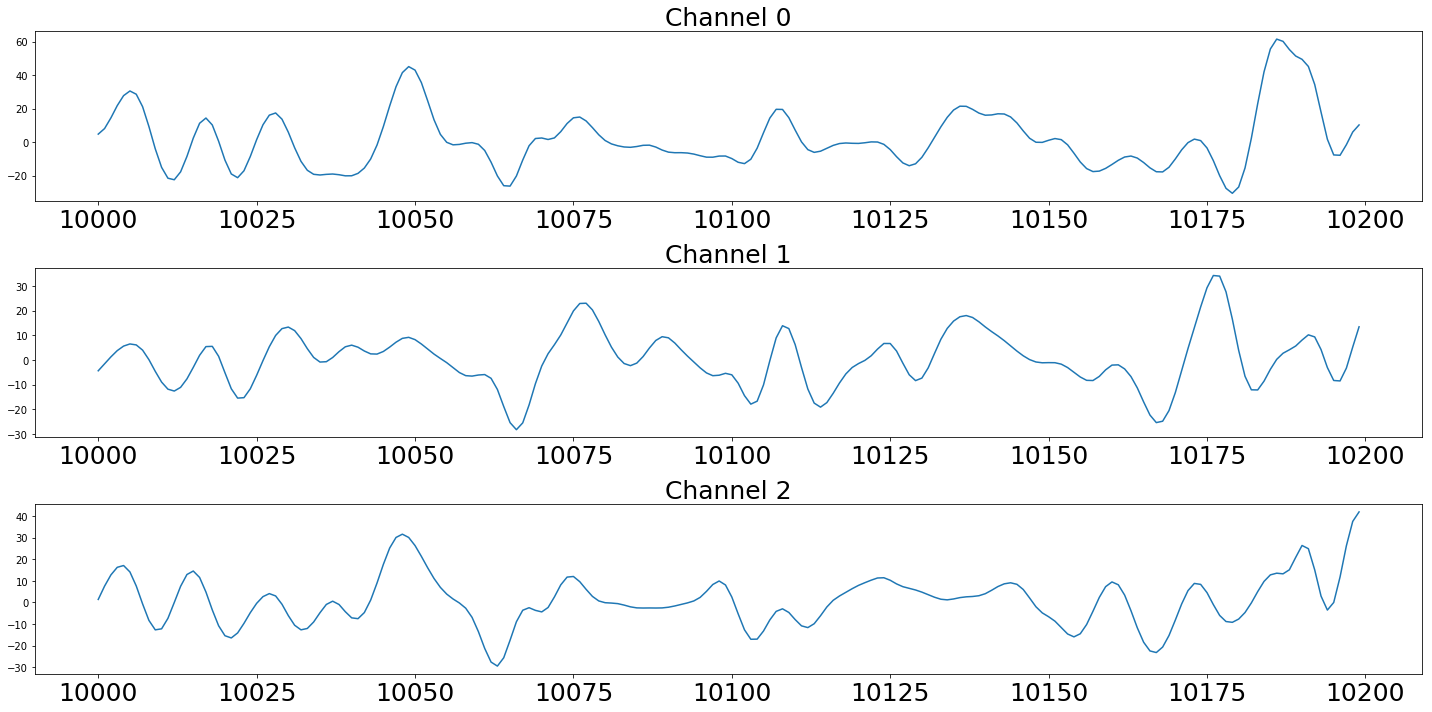

In [31]:
filtered.plot_series(from_time=10000, to_time=10200, channels=range(3))

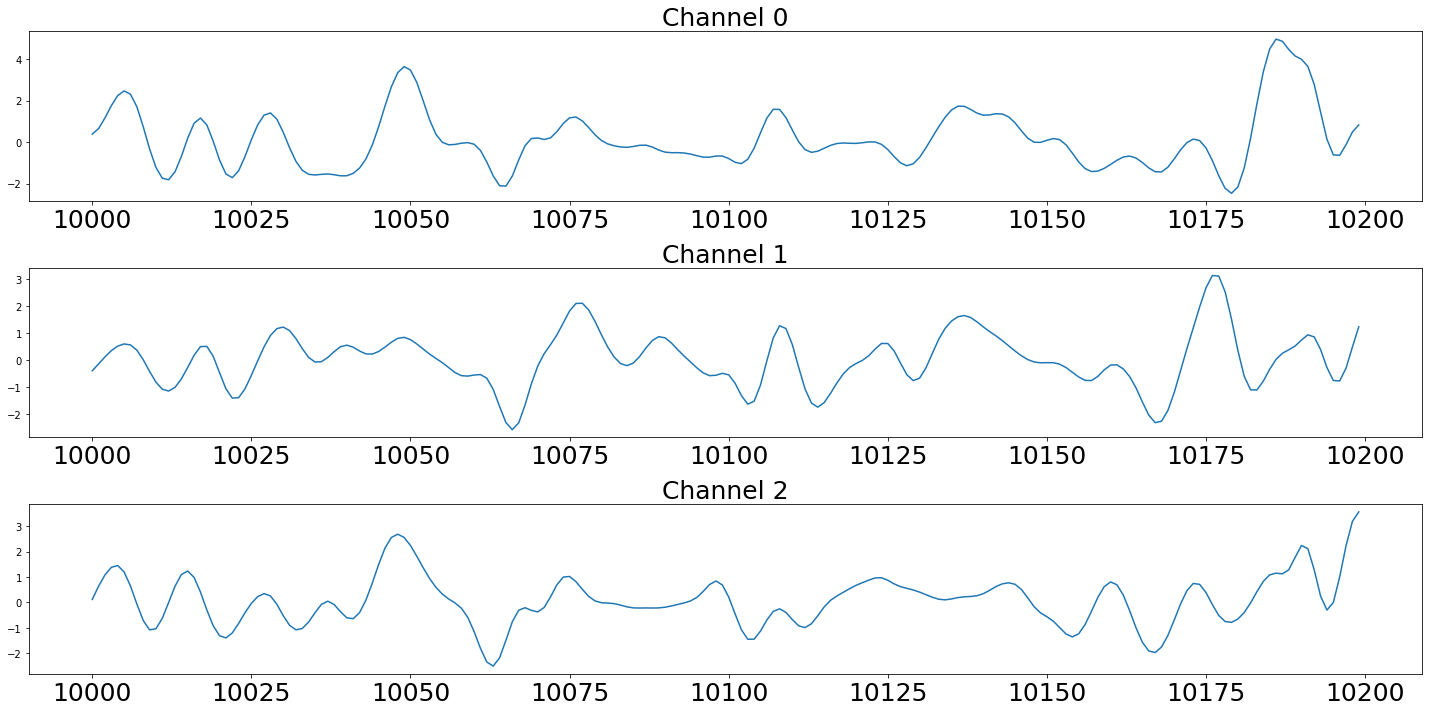

In [32]:
standarized.plot_series(from_time=10000, to_time=10200, channels=range(3))

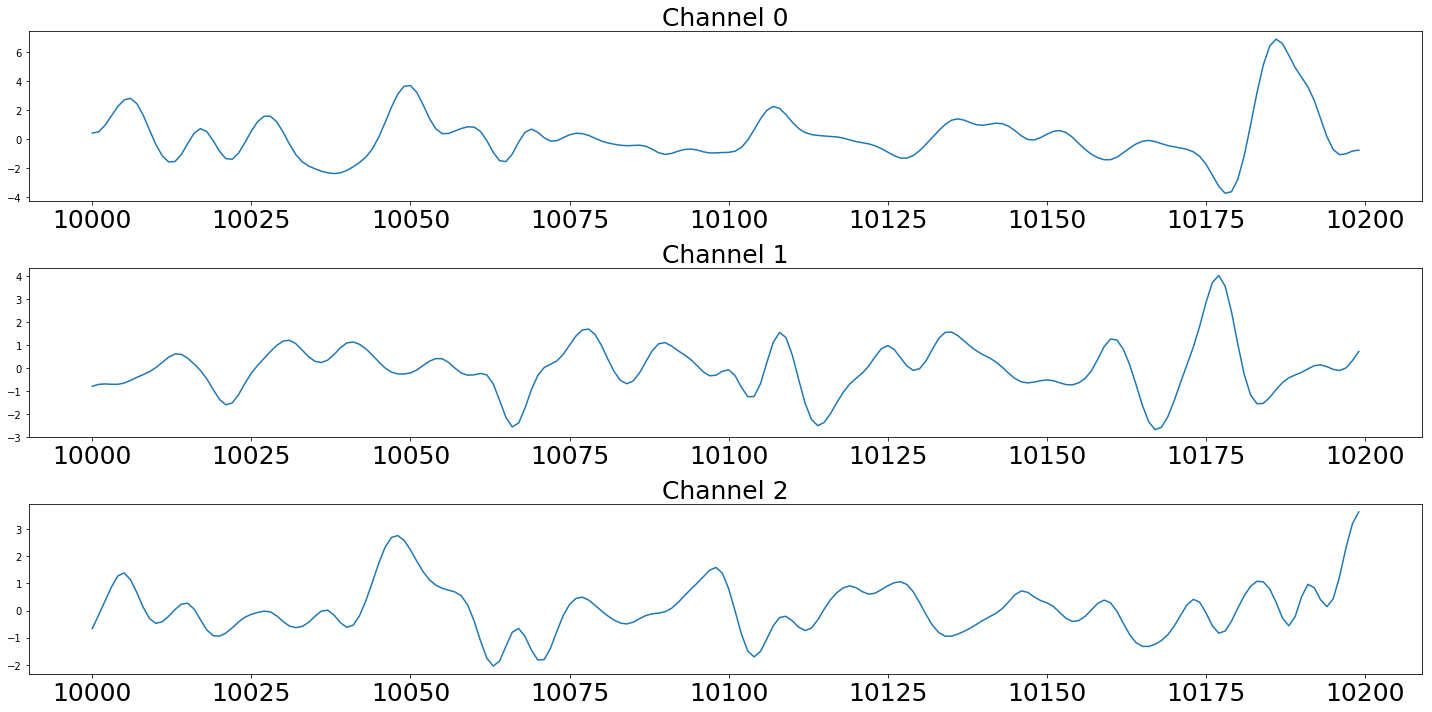

In [33]:
whitened.plot_series(from_time=10000, to_time=10200, channels=range(3))

In [52]:
explorer = SpikeTrainExplorer(path.join(TMP, 'spike_train.npy'), standarized)

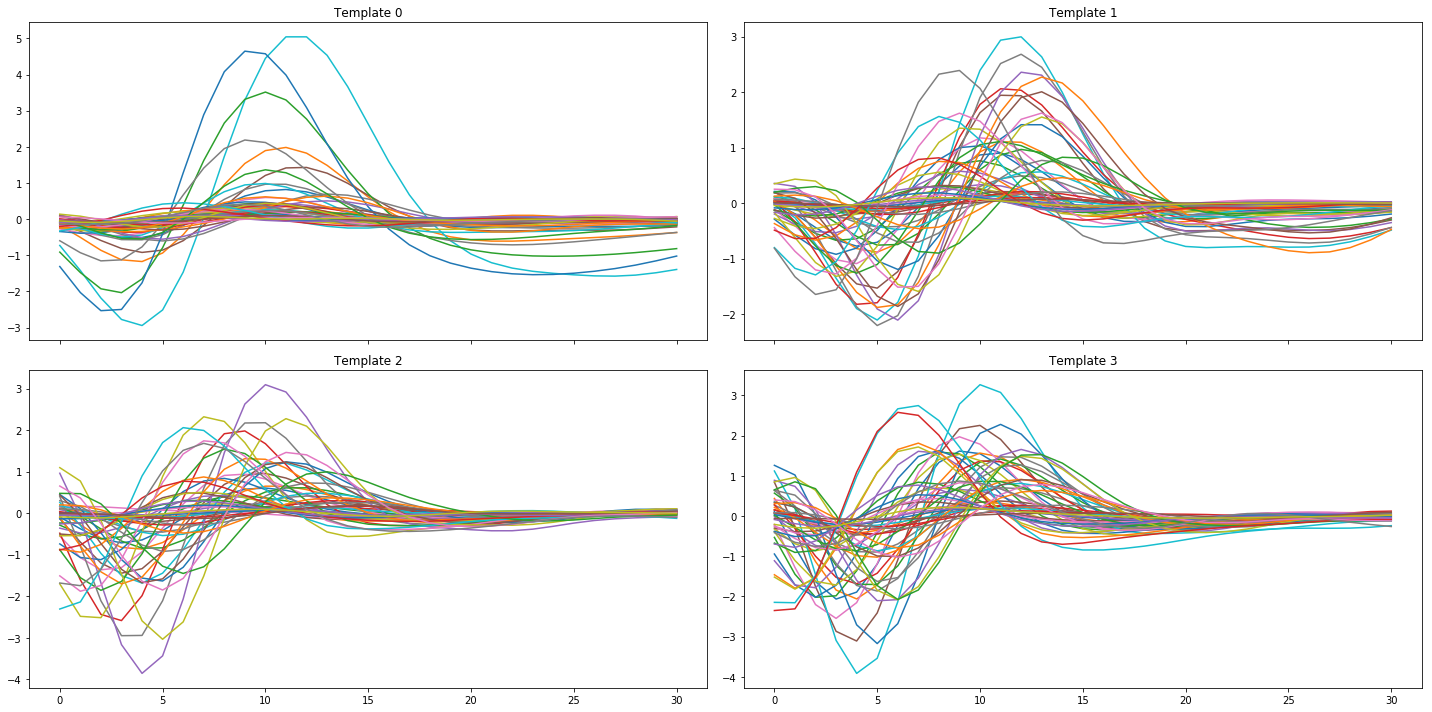

In [53]:
explorer.plot_templates(group_ids=[0, 1, 2 ,3])

In [74]:
spike_index_clear = np.load(path.join(TMP, 'spike_index_clear.npy'))
spike_index_clear

array([[     84,       4],
       [    132,      21],
       [    187,      23],
       ..., 
       [5999790,      16],
       [5999815,      26],
       [5999947,      12]])

In [78]:
plt.rcParams['figure.figsize'] = (6, 10)

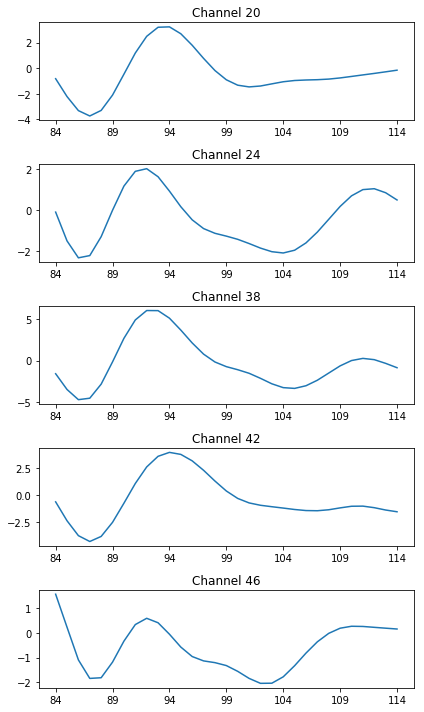

In [82]:
standarized.plot_waveform_around_main_channel(84, line_at_t=True)

In [54]:
templates = np.load(path.join(TMP, 'templates.npy'))

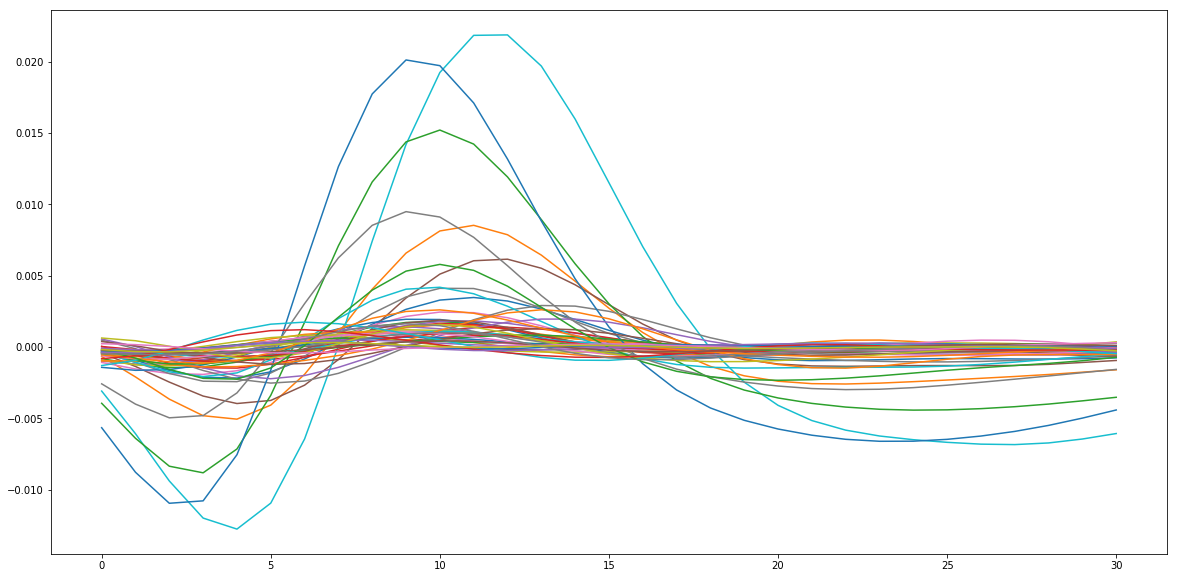

In [60]:
plt.plot(templates[:, :, 0].T)